/tmp/ipython-input-6-2074072556.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timestamps = pd.date_range(start='2025-06-24 10:00:00', periods=n, freq='5S')


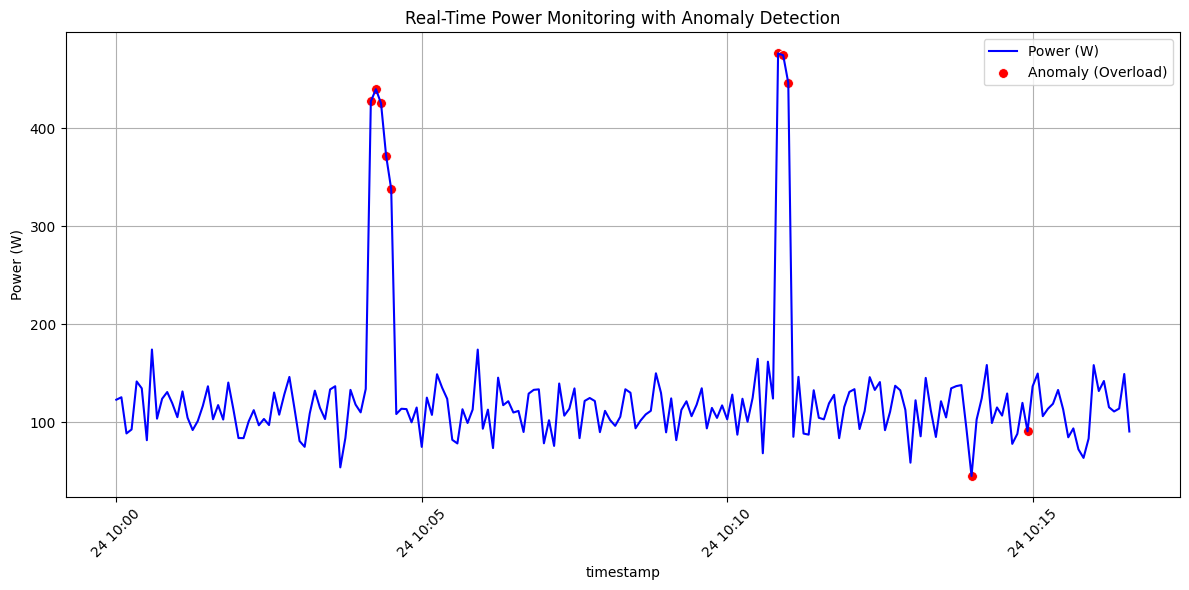

🔋 Total Energy Consumed: 34.78 Wh
🚨 Anomaly Timestamps:
              timestamp       power
50  2025-06-24 10:04:10  427.608432
51  2025-06-24 10:04:15  440.027507
52  2025-06-24 10:04:20  425.619772
53  2025-06-24 10:04:25  372.128469
54  2025-06-24 10:04:30  338.089406
130 2025-06-24 10:10:50  476.516269
131 2025-06-24 10:10:55  474.721592
132 2025-06-24 10:11:00  446.537598
168 2025-06-24 10:14:00   45.043674
179 2025-06-24 10:14:55   90.737856


In [6]:
# 📦 Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import IsolationForest
from datetime import datetime

# 📅 Step 2: Simulate Sensor Data from ESP32 (Voltage, Current)
n = 200
timestamps = pd.date_range(start='2025-06-24 10:00:00', periods=n, freq='5S')
voltage = np.random.normal(230, 2, n)
current = np.random.normal(0.5, 0.1, n)

# Inject a few anomalies
current[50:55] += 1.2  # simulate overload
current[130:133] += 1.5

# Compute power
power = voltage * current

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'voltage': voltage,
    'current': current,
    'power': power
})

# 🧠 Step 3: ML Integration – Anomaly Detection (Isolation Forest)
features = df[['voltage', 'current', 'power']]
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# ⚡ Step 4: Calculate Energy (in Wh)
df['delta_time'] = df['timestamp'].diff().dt.total_seconds().fillna(5)
df['energy_wh'] = (df['power'] * df['delta_time']) / 3600
total_energy = df['energy_wh'].sum()

# 📊 Step 5: Plot Results
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='timestamp', y='power', label='Power (W)', color='blue')
sns.scatterplot(data=df[df['anomaly'] == 1], x='timestamp', y='power', color='red', label='Anomaly (Overload)', s=50)
plt.xticks(rotation=45)
plt.ylabel("Power (W)")
plt.title("Real-Time Power Monitoring with Anomaly Detection")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📝 Step 6: Summary Output
print(f"🔋 Total Energy Consumed: {total_energy:.2f} Wh")
print("🚨 Anomaly Timestamps:")
print(df[df['anomaly'] == 1][['timestamp', 'power']])
